## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with AG News Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


The ag news dataset comprises around 18000 news text in 4 categories.

In [2]:
# Read the csv file agnews.csv
mydata_train = pd.read_csv('agnews.csv')
mydata_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
mydata_train.head()

,ClassIndex,Title,Description
0,1,"""Greed and arrogance,"" made Rod Stewart keep c...",AFP - Raspy-voiced British Rock star Rod Stewa...
1,1,Darfur families face food misery,A World Food Programme survey says almost half...
2,1,Italy looks for Arab support to free hostages ...,ROME : A top Italian official leaves for the M...
3,1,Air pollution causes five million deaths each ...,AFP - As many as five million deaths are cause...
4,2,Fergie: Only A Win Will Do,Sir Alex Ferguson is convinced Manchester Unit...


In [4]:
# Print the news categories in the dataset
print(list(mydata_train.ClassIndex))

[1, 1, 1, 1, 2, 2, 1, 1, 3, 4, 2, 4, 4, 3, 2, 2, 4, 3, 4, 4, 3, 3, 2, 1, 2, 3, 2, 2, 4, 4, 2, 1, 2, 4, 1, 1, 1, 1, 2, 1, 1, 3, 3, 4, 2, 2, 3, 3, 2, 1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 4, 4, 1, 2, 1, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 4, 4, 4, 3, 4, 1, 2, 1, 4, 2, 3, 1, 1, 2, 4, 4, 4, 4, 4, 2, 1, 4, 4, 2, 1, 1, 3, 1, 1, 3, 1, 2, 2, 3, 4, 2, 4, 4, 4, 1, 3, 1, 3, 1, 3, 1, 3, 2, 4, 1, 1, 4, 1, 2, 4, 3, 1, 4, 2, 1, 3, 3, 3, 4, 1, 3, 3, 2, 1, 3, 3, 2, 4, 4, 2, 3, 4, 3, 1, 3, 3, 2, 3, 1, 1, 2, 2, 2, 4, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 2, 4, 1, 1, 3, 3, 2, 4, 3, 3, 1, 3, 2, 2, 1, 3, 4, 1, 2, 1, 3, 2, 1, 2, 1, 4, 1, 1, 3, 3, 3, 2, 3, 2, 4, 2, 2, 2, 1, 1, 3, 1, 2, 4, 4, 2, 3, 2, 2, 3, 2, 1, 3, 3, 2, 4, 2, 1, 4, 1, 1, 1, 4, 1, 1, 3, 4, 2, 3, 1, 3, 2, 4, 3, 3, 1, 3, 2, 4, 4, 4, 2, 1, 1, 1, 2, 3, 4, 1, 2, 3, 2, 1, 4, 2, 2, 3, 4, 3, 3, 3, 3, 4, 2, 1, 1, 3, 3, 2, 3, 4, 3, 3, 4, 3, 4, 1, 2, 2, 4, 4, 4, 3, 1, 4, 4, 4, 4, 2, 3, 3, 3, 4, 1, 3, 4, 4, 1, 1, 4, 3, 2, 3, 4, 3, 2, 3, 3, 2, 3, 4, 2, 4, 3, 3, 1, 

In [5]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [6]:
mydata_train.isnull().sum()

ClassIndex     0
Title          0
Description    0
dtype: int64

In [7]:
# Check the length of the data
print(len(mydata_train.ClassIndex))
print(len(mydata_train.Description))


18000
18000


### Expected Output: 
18000

18000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [8]:
text = mydata_train.Description

## Preprocessing the Corpus

In [9]:
# Preprocessing the data

lines = [] 
word_list = [] 
    
for line in text:
    #tokenize the text documents and update the lists word_list and lines
#     words = [word.lower() for word in word_tokenize(line) if word.isalpha()]
    word_tokens = word_tokenize(line)
    words = []
    for word in word_tokens:
        if word.isalpha():
            word = word.lower()
            words.append(word)
            if word not in word_list:
                word_list.append(word)
    lines.append(words)
    
# # Make sure the word_list contains unique tokens
word_list = list(set(word_list))

# # Calculate the total documents present in the corpus
total_docs = len(text)
 
# #Create a dictionary to keep track of index of each word
dict_idx = {}
for idx, word in enumerate(word_list):
    dict_idx[word] = idx

In [10]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    
    for word in word_list:
        freq_word[word] = 0
        for line in lines:
            if word in line:
                freq_word[word] += 1
    
    return freq_word

In [11]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'mandating': 1,
 'jars': 1,
 'hatched': 2,
 'margin': 14,
 'ibms': 3,
 'personalities': 1,
 'facial': 2,
 'angulo': 1,
 'estrada': 1,
 'feith': 1,
 'workplaces': 1,
 'testify': 4,
 'attitudes': 2,
 'usemod': 1,
 'kaka': 1,
 'experts': 81,
 'heights': 3,
 'chats': 1,
 'sinewy': 1,
 'ghraib': 14,
 'litany': 1,
 'distributor': 17,
 'malnourished': 1,
 'arkansas': 5,
 'surprisingly': 16,
 'missiles': 17,
 'fincke': 4,
 'fireball': 1,
 'personalize': 1,
 'redskins': 32,
 'middlesex': 1,
 'noam': 2,
 'fittingly': 1,
 'paralyzed': 2,
 'misrepresented': 2,
 'allies': 16,
 'donaldson': 2,
 'racks': 1,
 'readings': 1,
 'boss': 50,
 'nicole': 1,
 'changi': 1,
 'latestversion': 1,
 'partys': 1,
 'atlas': 6,
 'ipods': 6,
 'sternum': 2,
 'distraught': 3,
 'gizmondo': 1,
 'nowadays': 1,
 'polarizing': 1,
 'tokage': 2,
 'tewksbury': 1,
 'bartolo': 2,
 'huey': 1,
 'herbicide': 1,
 'traction': 4,
 'decorated': 2,
 'renewal': 5,
 'karstadtquelle': 1,
 'pioli': 1,
 'deployments': 2,
 'glories': 2,
 'adde

In [12]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    
    # finding the word occurences in the document
    tf = len([w for w in document if w == word ])
    
    # the count of word occurrences normalized (divided) by the number of terms in the document.
    tf = tf / len(document)
    
    return tf

In [13]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    if word in freq_word:
        docs_with_word = freq_word[word] + 1
    else:
        docs_with_word = 1
    
    idf = np.log(total_docs / docs_with_word)
    
    return idf

In [14]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    # initialize tf_idf_vec with zeros
    tf_idf_vec = np.zeros((len(word_list), ))

    for word in sentence:
        tf = term_frequency(sentence, word)
        idf = inverse_df(word)
        
        tf_idf = tf * idf
        tf_idf_vec[dict_idx[word]] = tf_idf
    
    return tf_idf_vec

In [15]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

tf_idf_vecs = np.vstack([tfidf(line, dict_idx) for line in lines])
tf_idf_vecs.shape

(18000, 27535)

In [16]:
# print(lines[10])
# for idx, tf_idf in enumerate(tf_idf_vecs[10]):
#     if tf_idf > 0:
#         print(word_list[idx], ' ')

In [17]:
target = mydata_train.ClassIndex.to_numpy()
target.shape

(18000,)

## Multinomial Naive Bayes (10 Points)

In [18]:
#Fit a Multinomial Naive Bayes Model on our dataset

model = MultinomialNB()
model.fit(tf_idf_vecs, target)

MultinomialNB()

In [19]:
target

array([1, 1, 1, ..., 2, 4, 2])

In [20]:
#Perform testing on the train dataset

pred = model.predict(tf_idf_vecs)
pred

array([2, 1, 1, ..., 2, 4, 2])

In [21]:
#Calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(target, pred, average='macro')
Accuracy = metrics.accuracy_score(target, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9231203055183472
Accuracy:  0.9232777777777778


### Expected Output:
F1 Score: 0.9604092771164052

Accuracy: 0.9604444444444444


Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [22]:
# install libraries
#pip install wikipedia

In [43]:
import wikipedia
from wikipedia.exceptions import WikipediaException

topics = ["Algorithms", "Turing Award", "Astronomy", "Presidents of USA", "Thermodynamics"]
articles = [
    "InsertionSort", 
    "MergeSort", 
    "Selection Sort", 
    "QuickSort", 
    "ShellSort", 
    "HeapSort", 
    "BubbleSort", 

    "Donald Knuth",
    "Edsger_W._Dijkstra",
    "Robert W. Floyd",
    "Alan_Perlis",
    "Sir Maurice Vincent Wilkes",
    "Richard Hamming",
    "Marvin Minsky",
    
    "Astronomy",
    "Astronomical_object",
    "Supernova",
    "Gamma-ray_burst",
    "Galaxy",
    "Interstellar_medium",    
    
    
    'George_Washington',
    'Grover_Cleveland',
    'William_McKinley',
    'Theodore_Roosevelt',
    'William_Howard_Taft',
    'Woodrow_Wilson',
    'Calvin_Coolidge',
    'Herbert_Hoover',
    'Franklin_D._Roosevelt',
    'Dwight_D._Eisenhower',
    'John Kennedy',
    'Lyndon Johnson',
    'Richard_Nixon',
    'Gerald_Ford',
    'Ronald_Reagan',
    'Bill_Clinton',
    'Barack_Obama',
    'Donald_Trump',
    'Joe Biden n',
    
    "Joule_effect",
    "Radiative_cooling",
    "Zeroth_law_of_thermodynamics",
    "Second_law_of_thermodynamics",
    "Third_law_of_thermodynamics",
    "Rational_thermodynamics",
    "Joule–Thomson_effect",
    
]

data = []
for article in articles:
    data.append(wikipedia.summary(article))
topic_numbers=[1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5]

In [24]:
len(data)

46

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

Ues Cleaning text data will definitely help in the clustering because we need to remove the parts which don't add more meaning to the text data. Most of these parts are redudandant and provide no information to the text. We need to convert all the letters to same case as they mean the same thing hence we convert them into lower case and then it will help in vectorizing step. The urls, stop words are removed. And then the lemmatization is performed. 

In [25]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_message(message):
    message = message.lower()
    message = re.sub(r"http\S+|www.\S+", "", message)
    message = message.replace(".", " ")

    message = "".join([c for c in message if c not in string.punctuation])
    message = " ".join([word for word in re.split('\W+', message) 
                               if word not in stopwords.words('english')])
    wn = nltk.WordNetLemmatizer()    
    message = " ".join([wn.lemmatize(word, 'r') for word in re.split('\W+', message)])
    return message


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajaykarthicksenthilkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_data = [clean_message(message) for message in data]

tf = TfidfVectorizer()
X = tf.fit_transform(cleaned_data).toarray()

In [27]:
print(X.shape)

(46, 3688)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [28]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data

X_new = TSNE(learning_rate=50).fit_transform(X)
X_new.shape

/Users/ajaykarthicksenthilkumar/miniconda/envs/tf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(46, 2)

Plot and annotate the points with different markers for different expected groups.

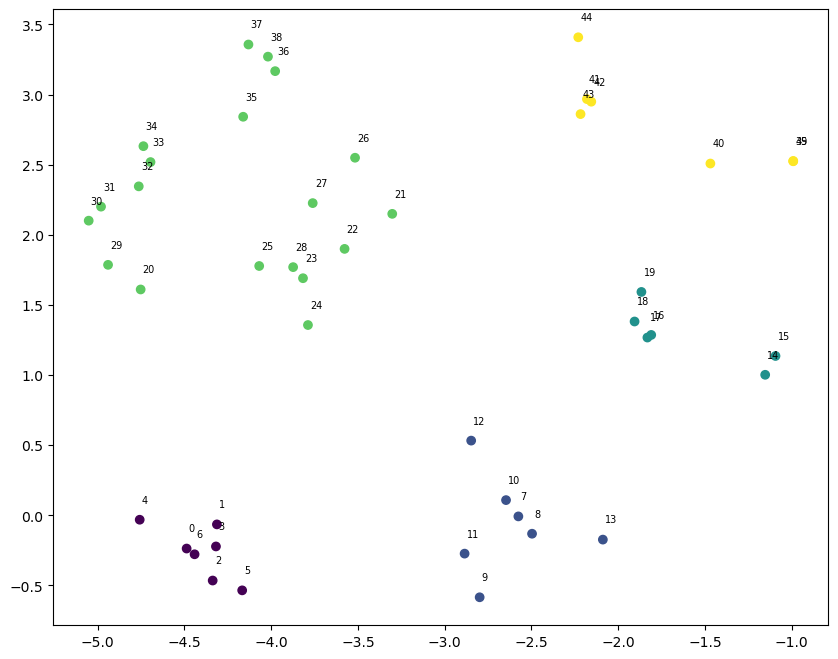

In [48]:
import matplotlib.pyplot as plt

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))
xs = X_new[:, 0]
ys = X_new[:, 1]
plt.scatter(xs, ys, c=variety_numbers)

# Annotate the points
for x, y, t_n in zip(xs, ys, range(len(topic_numbers))):
    plt.annotate(t_n, (x+0.012, y+0.12), fontsize=7)
plt.show()

plt.show()

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  


Yes the articles of the related topics are very well clustered together. I picked the topics "Algorithms", "Turing Award", "Astronomy", "Presidents of USA", "Thermodynamics". And pulled 46 articles related to these 5 topics. After the T-SNE (t-distributed Stochastic Neighbor Embedding) categorization using the  Nonlinear dimensionality reduction  is done, the articles belongs to the same topic are clustered together.

# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajaykarthicksenthilkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ajaykarthicksenthilkumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/ajaykarthicksenthilkumar/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [31]:
# Import the data.csv only use 'text' and 'target' columns
data = pd.read_csv('data.csv', usecols=['text', 'target'])

# data
# expected shape of dataset is (7613, 2)
data.shape

(7613, 2)

In [32]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [33]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [34]:
# clean the text in the dataframe using the clean_text function provided above
cleaned_text = []

for idx in range(data.shape[0]):
    cleaned_text.append(data['text'][idx])
len(cleaned_text)

7613

In [35]:
# initialise count vectorizer from sklearn module with default parameter
c_vect = CountVectorizer()

# fit and transform on dataset
X = c_vect.fit_transform(cleaned_text).toarray()
X.shape

(7613, 21637)

In [36]:
# get the values of target column
y = data['target'].to_numpy()
y.shape

(7613,)

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [37]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

    # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))

    # layer 2 : add the dense layer with 64 units and relu activation
    x = tf.keras.layers.Dense(64, input_dim = X.shape[1] , activation = 'relu')(inp)

    # layer 3 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

    # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(32, activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x) 

    # layer 5 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

    # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(16, activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x) 

    # layer 7 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

    # layer 8 : output layer with units equal to 1 and activation as sigmoid
    x = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)

    model = tf.keras.models.Model(inputs=inp, outputs=x)

    # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
    
    opt = tf.keras.optimizers.RMSprop(learning_rate=1e-03)
    model.compile(loss = 'binary_crossentropy' , optimizer = opt, metrics = [tf.keras.metrics.AUC()]) 

    return model


In [38]:
# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5

skf =  StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Now Split the countvectors and target (y)
splits = skf.split(X, y)
auc_metrics = []
fold = 1
# iterate through the train and valid index in splits for 5 folds
for train_index, val_index in splits:
    # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X[train_index], X[val_index]
    y_train, y_valid = y[train_index], y[val_index]

    #call the build_model function and initialize the model
    model = build_model(X_train)

    # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
    # adjust batch size according to your computation power (suggestion use : 16)
    print(f'Fold Number {fold}')
    history = model.fit(
        X_train,
        y_train,
        validation_data = (X_valid, y_valid),
        batch_size=16,
        epochs=5
    )
    fold += 1

    auc_metrics.append(history)

Metal device set to: Apple M1 Pro
Fold Number 1


2023-02-19 23:13:44.936750: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-19 23:13:44.937364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-02-19 23:13:45.853434: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-19 23:13:46.368005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.6178 - auc: 0.7686

2023-02-19 23:13:53.172838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 8s 20ms/step - loss: 0.6178 - auc: 0.7686 - val_loss: 0.5184 - val_auc: 0.8450
Epoch 2/5
381/381 [==============================] - 7s 18ms/step - loss: 0.4409 - auc: 0.8849 - val_loss: 0.4792 - val_auc: 0.8565
Epoch 3/5
381/381 [==============================] - 7s 18ms/step - loss: 0.3828 - auc: 0.9115 - val_loss: 0.4814 - val_auc: 0.8585
Epoch 4/5
381/381 [==============================] - 7s 18ms/step - loss: 0.3440 - auc: 0.9267 - val_loss: 0.4838 - val_auc: 0.8616
Epoch 5/5
381/381 [==============================] - 7s 18ms/step - loss: 0.3199 - auc: 0.9349 - val_loss: 0.4852 - val_auc: 0.8616
Fold Number 2
Epoch 1/5


2023-02-19 23:14:23.439494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.6165 - auc_1: 0.7701

2023-02-19 23:14:30.372298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 9s 21ms/step - loss: 0.6165 - auc_1: 0.7701 - val_loss: 0.5296 - val_auc_1: 0.8332
Epoch 2/5
381/381 [==============================] - 7s 19ms/step - loss: 0.4423 - auc_1: 0.8862 - val_loss: 0.4963 - val_auc_1: 0.8450
Epoch 3/5
381/381 [==============================] - 7s 18ms/step - loss: 0.3783 - auc_1: 0.9141 - val_loss: 0.4915 - val_auc_1: 0.8501
Epoch 4/5
381/381 [==============================] - 7s 18ms/step - loss: 0.3482 - auc_1: 0.9253 - val_loss: 0.4877 - val_auc_1: 0.8527
Epoch 5/5
381/381 [==============================] - 7s 19ms/step - loss: 0.3223 - auc_1: 0.9355 - val_loss: 0.4922 - val_auc_1: 0.8524
Fold Number 3
Epoch 1/5


2023-02-19 23:15:02.020551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.6035 - auc_2: 0.7819

2023-02-19 23:15:08.856664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 8s 20ms/step - loss: 0.6035 - auc_2: 0.7819 - val_loss: 0.5150 - val_auc_2: 0.8398
Epoch 2/5
381/381 [==============================] - 7s 19ms/step - loss: 0.4402 - auc_2: 0.8842 - val_loss: 0.5108 - val_auc_2: 0.8429
Epoch 3/5
381/381 [==============================] - 7s 19ms/step - loss: 0.3754 - auc_2: 0.9132 - val_loss: 0.5076 - val_auc_2: 0.8470
Epoch 4/5
381/381 [==============================] - 7s 19ms/step - loss: 0.3344 - auc_2: 0.9290 - val_loss: 0.5321 - val_auc_2: 0.8457
Epoch 5/5
381/381 [==============================] - 7s 19ms/step - loss: 0.3142 - auc_2: 0.9359 - val_loss: 0.5471 - val_auc_2: 0.8419
Fold Number 4
Epoch 1/5


2023-02-19 23:15:40.482955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.6169 - auc_3: 0.7662

2023-02-19 23:15:47.497872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 9s 21ms/step - loss: 0.6169 - auc_3: 0.7662 - val_loss: 0.5098 - val_auc_3: 0.8426
Epoch 2/5
381/381 [==============================] - 7s 19ms/step - loss: 0.4375 - auc_3: 0.8860 - val_loss: 0.4800 - val_auc_3: 0.8536
Epoch 3/5
381/381 [==============================] - 7s 19ms/step - loss: 0.3732 - auc_3: 0.9154 - val_loss: 0.4879 - val_auc_3: 0.8539
Epoch 4/5
381/381 [==============================] - 7s 19ms/step - loss: 0.3353 - auc_3: 0.9295 - val_loss: 0.4892 - val_auc_3: 0.8525
Epoch 5/5
381/381 [==============================] - 7s 19ms/step - loss: 0.3117 - auc_3: 0.9390 - val_loss: 0.4948 - val_auc_3: 0.8514
Fold Number 5
Epoch 1/5


2023-02-19 23:16:19.313402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.6079 - auc_4: 0.7750

2023-02-19 23:16:26.698103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 9s 22ms/step - loss: 0.6079 - auc_4: 0.7750 - val_loss: 0.5131 - val_auc_4: 0.8444
Epoch 2/5
381/381 [==============================] - 7s 19ms/step - loss: 0.4370 - auc_4: 0.8876 - val_loss: 0.4741 - val_auc_4: 0.8614
Epoch 3/5
381/381 [==============================] - 8s 20ms/step - loss: 0.3753 - auc_4: 0.9153 - val_loss: 0.4665 - val_auc_4: 0.8648
Epoch 4/5
381/381 [==============================] - 8s 21ms/step - loss: 0.3368 - auc_4: 0.9305 - val_loss: 0.4792 - val_auc_4: 0.8630
Epoch 5/5
381/381 [==============================] - 8s 20ms/step - loss: 0.3142 - auc_4: 0.9383 - val_loss: 0.4909 - val_auc_4: 0.8644


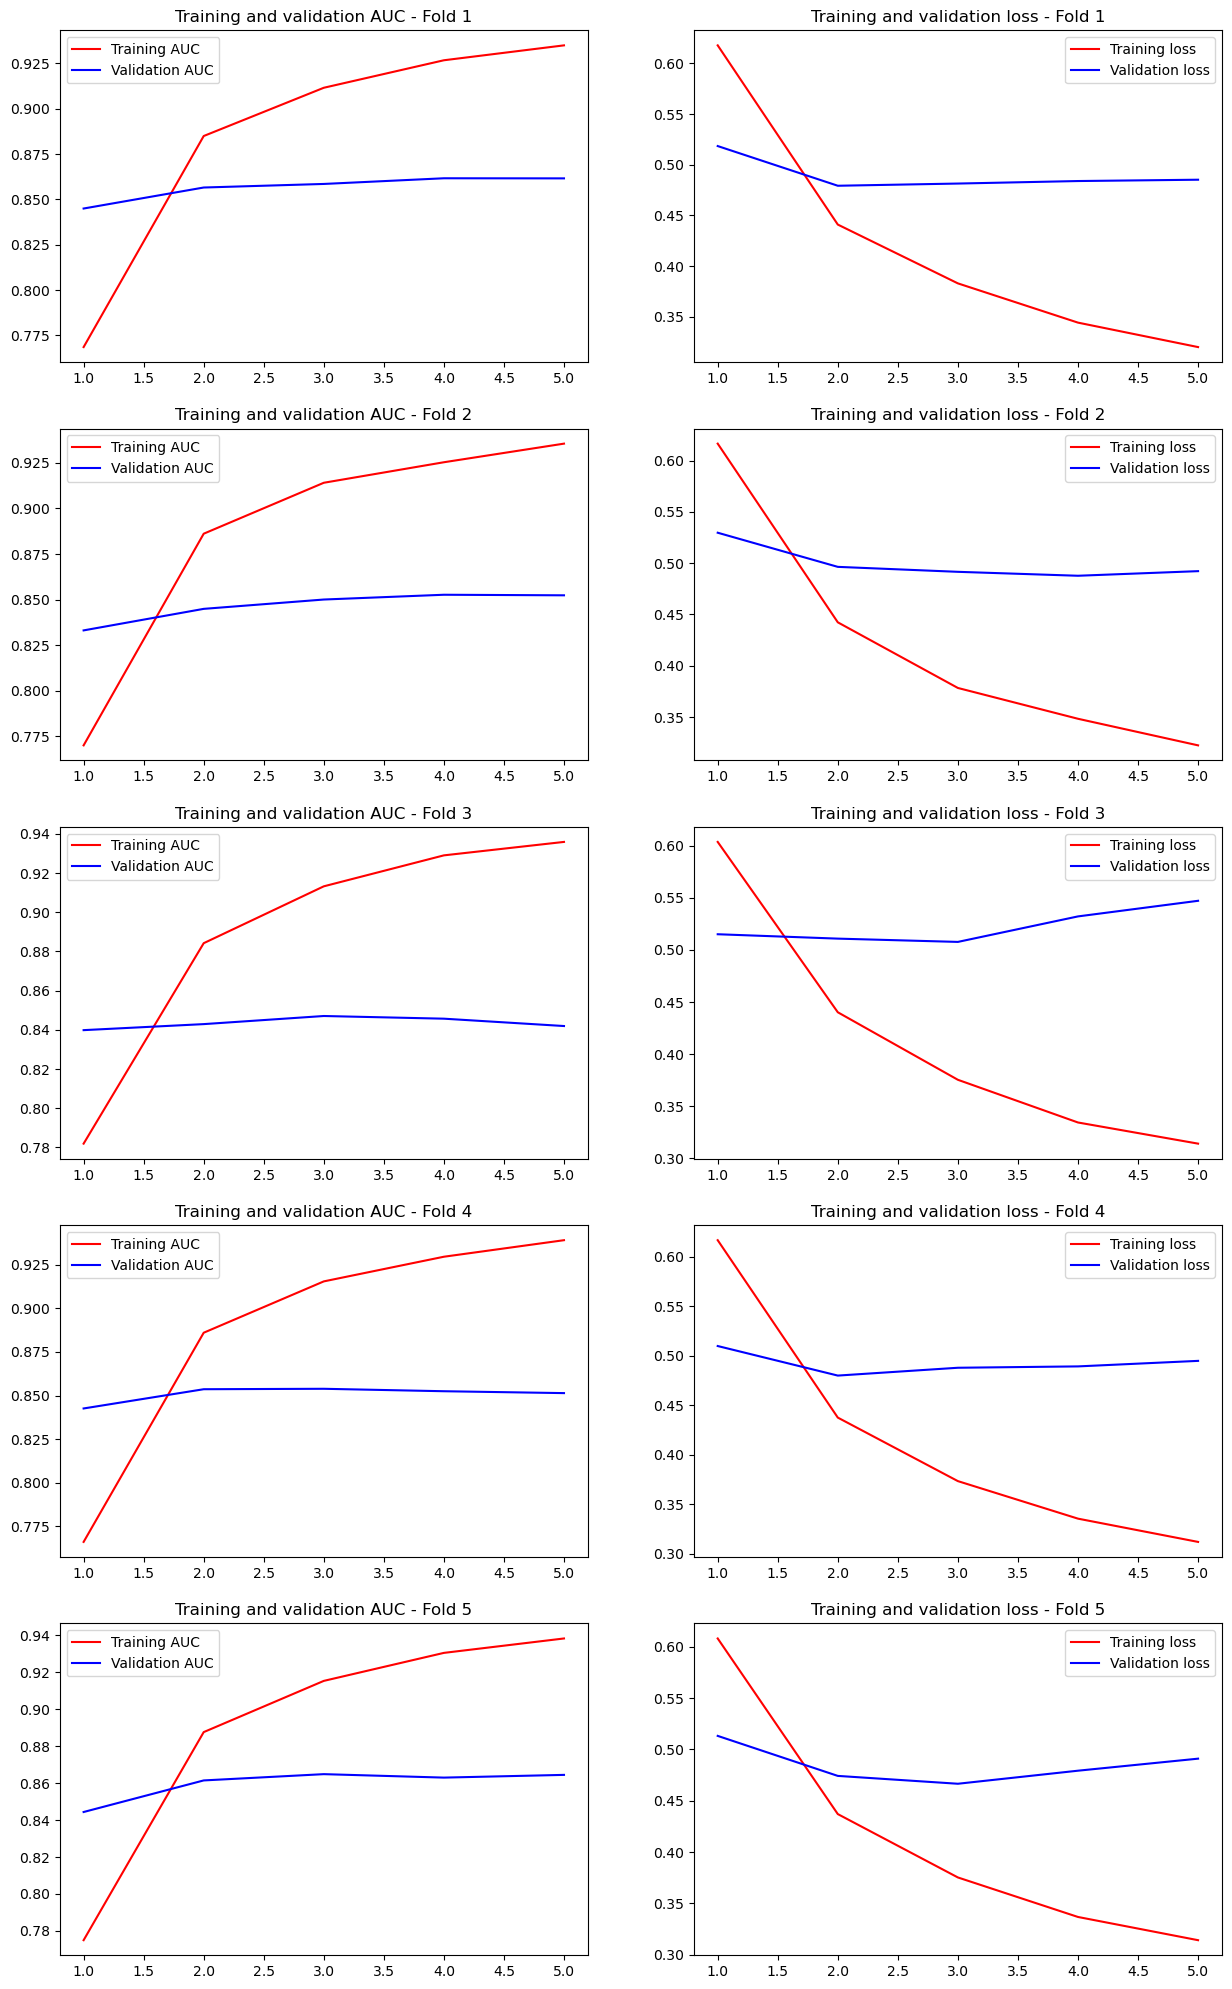

In [39]:
,# plot the graph between training auc and validation auc
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 2, figsize=(15, 25))

for fold, history in enumerate(auc_metrics):

    if fold > 0:
        auc = 'auc_' + str(fold)
        val_auc = 'val_auc_' + str(fold)
    else:
        auc = 'auc'
        val_auc = 'val_auc'
        
    acc = history.history[auc]
    val_acc = history.history[val_auc]
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    axs[fold, 0].plot(epochs, acc, 'r', label='Training AUC')
    axs[fold, 0].plot(epochs, val_acc, 'b', label='Validation AUC')
    axs[fold, 0].set_title('Training and validation AUC - Fold ' + str(fold+1))
    axs[fold, 0].legend()
    
    axs[fold, 1].plot(epochs, loss, 'r', label='Training loss')
    axs[fold, 1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[fold, 1].set_title('Training and validation loss - Fold ' + str(fold+1))
    axs[fold, 1].legend()

plt.show()

### Q) Comment on the plots. How did it varied across different folds for neural networks?

Stratified K-Fold helped in improving the model performance as the training dataset size is comparatively less.  stratified K-Fold comes in handy and the trianing AUC and Validation AUC is good across all the folds for neural networks. K-fold technique helped in reducing the overfitting. We can tweak the model parameters and try to improve the validation AUC even more and reduce the validation loss across all the folds.

# Building Multinomial Navie Bayes on Countvectors

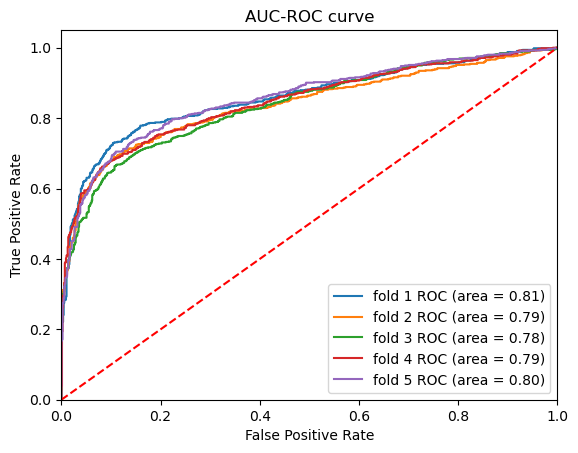

In [42]:

skf =  StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Now Split the countvectors and target (y)
splits = skf.split(X, y)
fold = 1
# iterate through the train and valid index in splits for 5 folds. Use the splits created above.
for train_index, val_index in splits:
    # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X[train_index], X[val_index]
    y_train, y_valid = y[train_index], y[val_index]


    # intialise multinomial navie bayes with default parameters
    model = MultinomialNB()

    # fit the data
    model.fit(X_train, y_train)
    y_pred=model.predict(X_valid)
    fpr, tpr, thresholds = metrics.roc_curve(y_valid, model.predict_proba(X_valid)[:,1])
    auc = metrics.roc_auc_score(y_valid, model.predict(X_valid))
    plt.plot(fpr, tpr, label=f'fold {fold} ROC (area = {auc:.2f})')

    fold += 1

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve')
plt.legend(loc="lower right")
plt.show()  


### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?

Multinomial Naive Bayes model is fitted with training data in StratifiedKFold with 5 folds and predicted validation data and the AUC-ROC curve is plotted as depicted above. The ROC and AUC values are good for the Multinomial Naive Bayes model the values are sligtly varying across the different folds for Multinomial NB model.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

All these are different types of word embeddings to represent the word in numbers to feed it to the machine learning models to perform machine learning tasks using the features it represents.

**Count Vectorizer**
Vector of word counts/frequencies. It converts the text documents into a sparse matrix of the counts of the words(tokens). 


**TF-IDF**
Vector of weighted terms/word scores that indicates the importance of a word to the document. TF-IDF stands for term frequency times inverse document frequency. Term frequencies are the counts of each word in a document while the inverse document frequency is the fraction of word counts by the number of documents in which the word occurs.

**Word2Vec**
Dense vector representation of the text. It is a kind of word embedding technique in which the unlabeled data is trained via neural network to create the embedding vector. It learns and produces embeddings by relating the target words to their context.


**Glove**
Another kind of word embedding techinique which retains the frequency of co-occurrences information. 

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

Both bag of words and TF-IDF are kinds of word embedding technique by which we can represent the text using vectors. Bag of words represents vectors of word counts/frequencies while the TF-IDF vectors represents word scores(weighting terms) that better represent their importance.

### Bag of words 
Naive Bayes Implementation using Bag of words as the feature extraction technique uses the features as the number of occurrences, or frequency, of each word in the given text. Bag of words contains unordered set of words with their position ignored, keeping only their frequency in the document. It is based on the assumption that the more times a word occurs, the more relevant it is to the document or it brings more meaning to the document. It may be suitable in some cases. It is easy to implement but it doesn't capture the semantic information of the original sentence.

### TF-IDF 
Naive Bayes Implementation using the TF-IDF vectors as the feature extractiont technique uses the features as the weighted terms/word scores that indicates how important a word is to a document in a collection or corpus. It captures some semantic information of the original text.

Bag of words doesn't capture the importance of the words and it just contains the frequence of words while the TF-IDF vectors carry the information about the importance of the words(how important a word is to the document) and it helps in better classifying text is most of the cases.